In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import random
import numpy as np

## Lets load all data from code report directory

In [2]:
base = 'report/'
files = os.listdir(base)

df_x = pd.DataFrame()
for file in files:
    df = pd.read_csv(base+file)
    df_x = pd.concat([df, df_x])

df_x

,Unnamed: 0,cyclomatic_complexity,length,file_name,number_of_functions,average_function_lenght,code_to_comment_ratio_percent
0,0,14,157,javascript_prog.js,10,15.700000,10.828025
0,0,1,5,sample3.c,1,5.000000,20.000000
0,0,10,60,sample.cpp,4,15.000000,18.333333
0,0,2,8,test.py,1,8.000000,37.500000
0,0,10,61,ruby_prog.rb,7,8.714286,14.754098
0,0,3,24,sample1.c,1,24.000000,0.000000
0,0,6,15,sample3.py,2,7.500000,20.000000


## lets create dummy data for code classification as per the assignment
- The dataset is generated based on following assumption.
- number of associated bugs would be based on code complexity.
- code to comment ratio will be high in complex and lengthier codes.

In [12]:
filename = ['file_'+str(i) for i in range(0,1000)]
file_extension = ['cpp','py','py','js','js','rb','c','c','py','py']*100
random.shuffle(file_extension)

X = np.random.randint(0, 20,1000)
X1 = np.random.randint(10,40,1000)
x2 = np.random.randint(1, 330,1000)

df = pd.DataFrame( X, columns=['cyclomatic_complexity'])
df['avg_function_length'] = X1
df['day_data'] = x2

df['z_score_c'] = (df['cyclomatic_complexity'] - df['cyclomatic_complexity'].mean()) / df['cyclomatic_complexity'].std()
df['z_score_l'] = (df['avg_function_length'] - df['avg_function_length'].mean()) / df['avg_function_length'].std()
df['z_score_d'] = (df['day_data'] - df['day_data'].mean()) / df['day_data'].std()

for row in df.iterrows():
    if row[1]['z_score_c'] > 0.7:
        df.at[row[0],'number_of_associated_bugs'] = np.random.randint(30, 70)
    elif -0.5 < row[1]['z_score_c'] < 0.7:
        df.at[row[0],'number_of_associated_bugs'] = np.random.randint(15, 40)
    else:
        df.at[row[0],'number_of_associated_bugs'] = np.random.randint(2, 20)

for row in df.iterrows():
    if row[1]['z_score_l'] > 0:
        df.at[row[0],'code_to_comment_ratio'] = np.random.randint(30, 60)
    else:
        df.at[row[0],'code_to_comment_ratio'] = np.random.randint(3, 40)

for row in df.iterrows():
    if row[1]['z_score_d'] > -0.5:
        df.at[row[0],'days_since_changed'] = np.random.randint(100, 320)
    else:
        df.at[row[0],'days_since_changed'] = np.random.randint(1, 150)

df.drop(columns=['day_data','z_score_c', 'z_score_l', 'z_score_d'], inplace=True)

df['filename'] = filename
df['file_extension'] = file_extension

In [13]:
df

,cyclomatic_complexity,avg_function_length,number_of_associated_bugs,code_to_comment_ratio,days_since_changed,filename,file_extension
0,5,17,15.0,15.0,132.0,file_0,py
1,14,30,63.0,48.0,168.0,file_1,cpp
2,15,23,43.0,26.0,227.0,file_2,rb
3,12,17,22.0,37.0,159.0,file_3,c
4,13,25,34.0,50.0,264.0,file_4,js
...,...,...,...,...,...,...,...
995,14,18,33.0,21.0,153.0,file_995,js
996,5,24,12.0,17.0,280.0,file_996,cpp
997,3,15,6.0,36.0,127.0,file_997,c
998,10,10,29.0,24.0,42.0,file_998,py


## Univariate analyses

/home/shivaraj/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='file_extension', ylabel='count'>

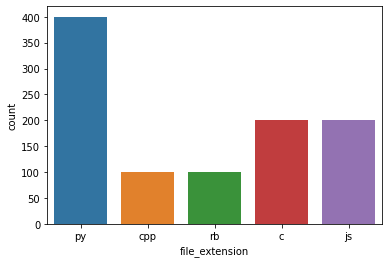

In [14]:
sns.countplot(df['file_extension'])

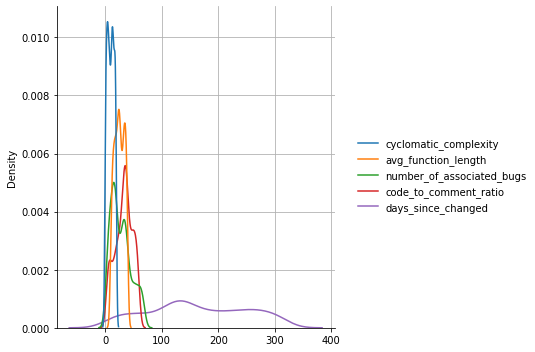

In [15]:
sns.displot(df.loc[:, ~df.columns.isin(['filename', 'file_extension'])],kind='kde')
plt.grid(True)

## Multivariant analyses

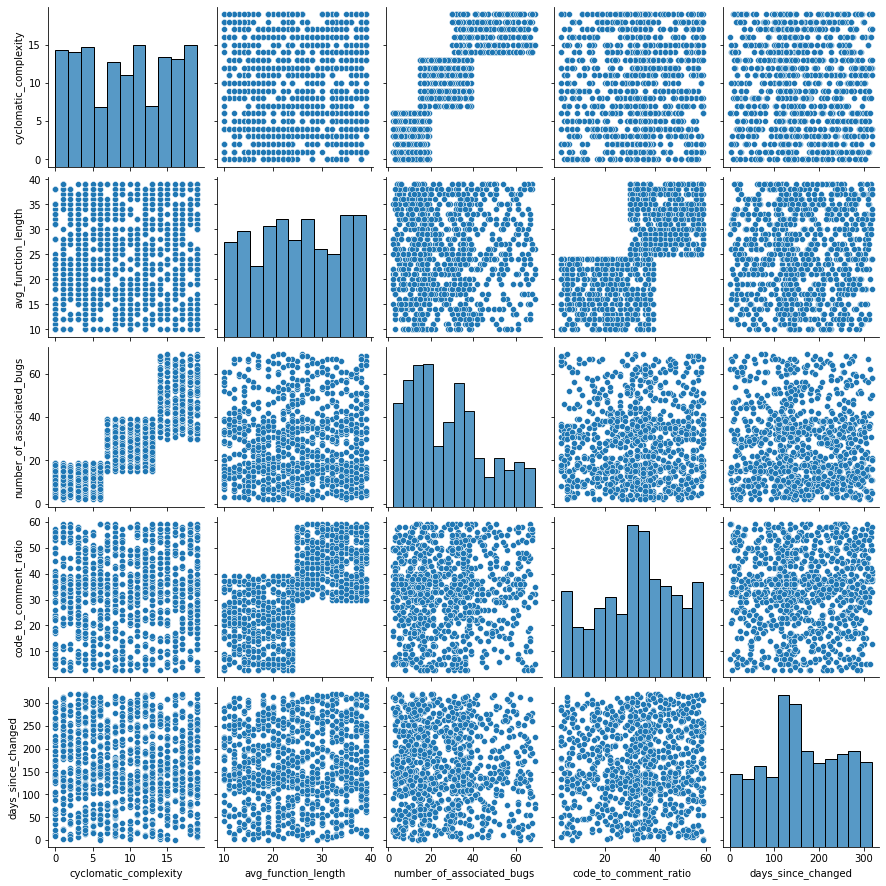

In [16]:
sns.pairplot(df.loc[:, ~df.columns.isin(['filename', 'file_extension'])])

## Categorize programs.
- Since we dont have labelled data to categorize programs into classes.
- We can treat it as unsupervised learning.
- We can group programmes into three categories.
    - Beginner level programmer.
    - Intermediate level programmer.
    - Experienced level programmer.

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

df_1.loc[:, ~df_1.columns.isin(['filename', 'file_extension'])] = scaler.fit_transform(df_1.loc[:, ~df_1.columns.isin(['filename', 'file_extension'])])
              
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_1.loc[:, ~df_1.columns.isin(['filename', 'file_extension'])])

In [44]:
df_x = pd.DataFrame(scaler.inverse_transform(df.loc[:, ~df.columns.isin(['filename', 'file_extension'])]), columns=df.columns[:-2])
df_x['filename'] = filename
df_x['file_extension'] = file_extension
df_x['labels'] = kmeans.labels_
df_x

,cyclomatic_complexity,avg_function_length,number_of_associated_bugs,code_to_comment_ratio,days_since_changed,filename,file_extension,labels
0,5.0,17.0,15.0,15.0,132.0,file_0,py,2
1,14.0,30.0,63.0,48.0,168.0,file_1,cpp,1
2,15.0,23.0,43.0,26.0,227.0,file_2,rb,1
3,12.0,17.0,22.0,37.0,159.0,file_3,c,2
4,13.0,25.0,34.0,50.0,264.0,file_4,js,1
...,...,...,...,...,...,...,...,...
995,14.0,18.0,33.0,21.0,153.0,file_995,js,1
996,5.0,24.0,12.0,17.0,280.0,file_996,cpp,2
997,3.0,15.0,6.0,36.0,127.0,file_997,c,2
998,10.0,10.0,29.0,24.0,42.0,file_998,py,2


In [45]:
df_groups = df_x.groupby('labels').aggregate({'cyclomatic_complexity':'mean',
                                 'avg_function_length':'mean',
                                 'number_of_associated_bugs':'mean',
                                 'code_to_comment_ratio':'mean',
                                 'days_since_changed':'mean'}).reset_index()

In [46]:
df_groups.style.background_gradient(cmap='Blues')

,labels,cyclomatic_complexity,avg_function_length,number_of_associated_bugs,code_to_comment_ratio,days_since_changed
0,0,6.270517,32.218845,17.577508,43.975684,166.553191
1,1,16.188854,25.876161,48.263158,35.043344,156.727554
2,2,6.344828,17.183908,18.250000,20.413793,164.925287


## Observation
- As we can see three categories in labels.
    - label 1 programs have average complexity is way higher than other two, and associated bugs are more, hence can be given to experienced programmmers.
    - label 0, 2 are less hard and also easily understandable because of better code to comment ratio and less average fucntion length. can be given to beginner and intermediate level programmers

In [47]:
df_x.loc[:, ~df_x.columns.isin(['filename', 'file_extension'])] = df_x.loc[:, ~df_x.columns.isin(['filename', 'file_extension'])].astype(int)

df_x['labels'].replace({2:'beginner level bugs',
                        0:'intermediate level bugs',
                        1:'experienced level bugs'},inplace=True)

In [48]:
df_x.to_csv('categorized_programmes.csv')